<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2004%20-%20Model/%20Entrega_04_Model_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OBTAIN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



El conjunto de datos contiene 150 registros bajo cinco atributos: longitud del sépalo 'Sepal Length', ancho del sépalo 'Sepal Width', largo del pétalo 'Petal Length', ancho del pétalo 'Petal Width' y especie 'Species'.

El conjunto de datos contiene 3 especies ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris. 

URL (https://archive.ics.uci.edu/ml/datasets/iris)

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])
iris.head()

Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
#comprobando si hay alguna inconsistencia en el tipo de datos
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Comprobando las dimensiones
iris.shape

(150, 5)

In [ ]:
#Comprobando los valores de la columna de Especies.
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

###SCRUB

Verificar la distribución de los datos de acuerdo a las especies de Iris, utilizando la columna Species y el tamaño de la misma.

In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#comprobar si un conjunto de datos contiene un valor faltante o no 
iris.isnull().sum()

print('Tenemos {} valores NaN/Null'.format(iris.isnull().values.sum()))

Tenemos 0 valores NaN/Null


###EXPLORE

Se visualiza un gráfico de dispersión, donde se ve la relacion entre el LARGO y el ANCHO del sépalo. El eje X contiene los datos de longitud y el eje Y los datos del ancho, a su vez para cada una de las especies de Iris le colocamos un color.

- Iris setosa de color naranjo
- Iris Versicolor de color azul
- Iris Virginica de color verde

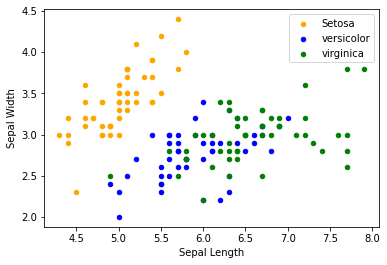

In [ ]:
#Longitud del sépalo VS Ancho. Este gráfico muestra la relación entre la longitud del sépalo y el ancho del sépalo.

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
plt.show()

Si te fijas en la gráfica los datos están distribuidos de manera casi uniforme sobretodo los correspondientes al Iris setosa, mientras que los correspondientes a versicolor y virginica tienen cualidades algo parecidas por lo que se translapan en ocasiones.

Ahora procedemos a hacer exactamente lo mismo, pero con la información de los pétalos.

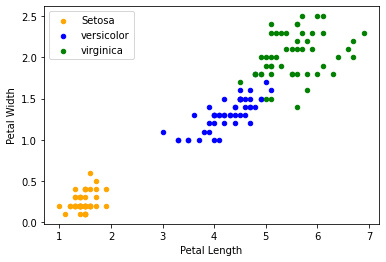

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='Petal Length',y='Petal Width',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='Petal Length',y='Petal Width',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='Petal Length',y='Petal Width',color='green', label='virginica',ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
plt.show()

Acá podemos observar una distribución mucho más uniforme en comparación con el sépalo. Como podemos ver, las características de los pétalos ofrecen una mejor división de grupos en comparación con las características de los sépalos. Esta es una indicación de que los Pétalos pueden ayudar en Predicciones mejores y precisas sobre el Sépalo.

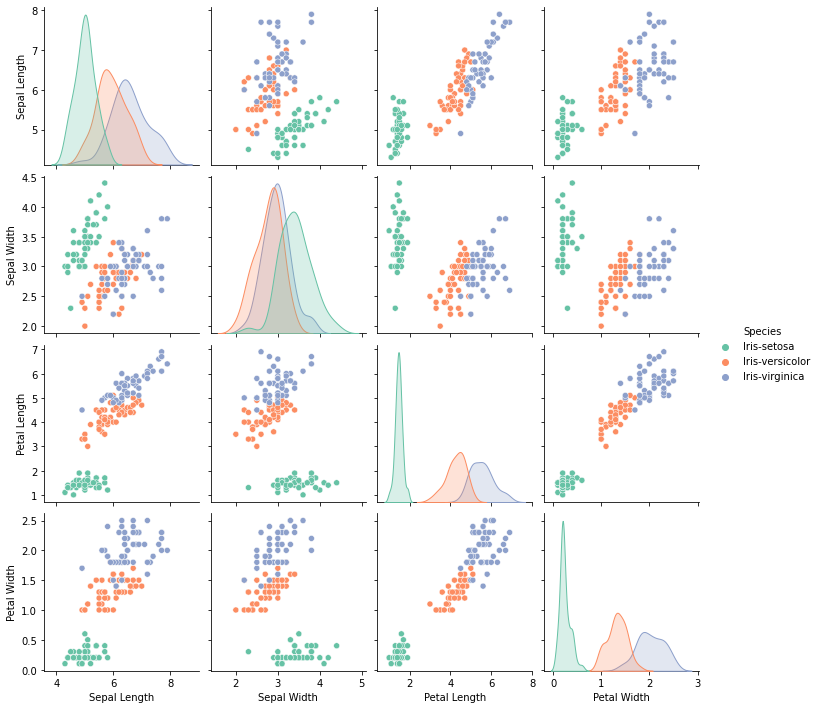

In [ ]:
#Visualizar las similitudes y diferencias entre las especies
sns.pairplot(data=iris, hue='Species', palette='Set2')

###MODEL

In [ ]:
from sklearn.svm import SVC #utilizar SVM
from sklearn import metrics #para comprobar la precisión del modelo
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier #utilizar Random Forest
from sklearn import datasets #importar conjunto de datos
import xgboost as xgb #utilizar xgboost

####**SVM** 

Primer modelo se implementa con el algoritmo de Máquinas de Vectores de Soporte [Support vector machine] (SVM). Es un algoritmo de aprendizaje supervisado que se utiliza en problemas de clasificación y regresión.




In [ ]:
#Separando la matriz en dos partes

#La submatriz 'x_svm' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
x_svm=iris.iloc[:,0:4]
x_svm

Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
#El vector contiene los valores de la columna 4 'Species' con todas las filas
y_svm=iris.iloc[:,4]
y_svm

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.30)

In [ ]:
print("Tamaño de los datos de train: ", len(x_train_svm))
print("Tamaño de los datos de test: ", len(x_test_svm))

Tamaño de los datos de train:  105
Tamaño de los datos de test:  45


In [ ]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(105, 4)
(105,)
(45, 4)
(45,)


Entrenamiento y ajuste del modelo

In [ ]:
model = SVC()
#Recomendación: Revisar los parámetros del clasificador https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svm
model.fit(x_train_svm, y_train_svm)

SVC()

Predictions from the trained model

In [ ]:
pred_svm = model.predict(x_test_svm)

Evaluacion del modelo, con métricas correspondientes

In [ ]:
print(classification_report(y_test_svm, pred_svm))
print(confusion_matrix(y_test_svm, pred_svm))
acc_svm = metrics.accuracy_score(pred_svm, y_test_svm)
print('The accuracy of the SVM is:', acc_svm)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 12  1]
 [ 0  1 15]]
The accuracy of the SVM is: 0.9555555555555556


###Random Forest


Random Forest es un algoritmo de aprendizaje automático se puede utilizar tanto para tareas de clasificación como de regresión.

In [ ]:
#Separando la matriz en dos partes

#La submatriz 'X_rf' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
X_rf = iris.iloc[:, 0:4]
X_rf

Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
#El vector contiene los valores de la columna 4 'Species' con todas las filas
y_rf = iris.iloc[:, 4]
y_rf

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf ,test_size = 0.3)

In [ ]:
print("Size of training data: ", len(X_train_rf))
print("Size of test data: ", len(X_test_rf))

Size of training data:  105
Size of test data:  45


In [ ]:
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
#Recomendación: Revisar los parámetros del clasificador https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicción de los resultados del conjunto de pruebas
y_pred_rf = classifier.predict(X_test_rf)

In [ ]:
#Hacer la matriz de confusión
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  3, 15]])

In [ ]:
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred_rf, y_test_rf))

The accuracy of the Random forest is: 0.9333333333333333


###XG Boost

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X_boost = iris.data
y_boost = iris.target

In [ ]:
X_boost

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y_boost

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Dividir las matrices en 70% training, 30% testing
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.3)

In [ ]:
print("Train data length:",len(X_train_boost));
print("Test data length:",len(X_test_boost));

Train data length: 105
Test data length: 45


In [ ]:
#Creación del formato de datos Xgboost DMatrix (a partir de los arreglos ya obtenidos)

import xgboost as xgb

d_boosttrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
d_boosttest = xgb.DMatrix(X_test_boost, label=y_test_boost)

In [ ]:
#Configuración de algunos parámetros. Recomendación: revisar https://xgboost.readthedocs.io/en/stable/parameter.html 

parameters = {'eta': 0.3, 'silent': True, 'objective': 'multi:softprob', 'num_class': 3, 'max_depth': 3}  
num_round = 20

In [ ]:
#Entrenar el modelo
bst = xgb.train(parameters, d_boosttrain, num_round)

In [ ]:
#predicción
preds = bst.predict(d_boosttest)

In [ ]:
preds[:5]

array([[0.9881627 , 0.00747472, 0.00436256],
       [0.9881627 , 0.00747472, 0.00436256],
       [0.9881627 , 0.00747472, 0.00436256],
       [0.9881627 , 0.00747472, 0.00436256],
       [0.01577981, 0.94543934, 0.03878086]], dtype=float32)

In [ ]:
#Seleccionar la columna que representa la mayor probabilidad 
#(tenga en cuenta que, para cada línea, hay 3 columnas, que indican la probabilidad de cada clase)

best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
best_preds

array([0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       0])

In [ ]:
#Hacer la matriz de confusión
m = confusion_matrix(y_test_boost, best_preds)
m

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  3, 13]])

In [ ]:
#calculando la precisión 

print(precision_score(y_test_boost, best_preds, average='macro'))

0.9206349206349206
